# Results and Analysis of Section 5 Speed Tests

**Some Informed Advice on getting the best perfomance from this tool:**
There will be some interplay between parameter initialisaiton and choice of learning rates, the behaviour of which is difficult to predict, and we can only advise rules of thumb. Indeed, the image properties themselves will affect how quickly the optimisation converges e.g. larger images tend to require less steps for convergence (which makes some sense given the greater information available). We've found that a judicious choice of initialisation for the kernel and background paramaters -- set so that the kernel pixels sum to 1 and the sky level is the median of the target image (for a background subtracted reference) -- works pretty well when combined with initial learning rates of 1e-3 for the kernel and 1e1 for the background. Of these two decisions, from experience we've found that the learning rates are the most important to get right for the best performance. The solution times aren't that strongly affected by the parameter initialisation; I guess we have automatic differentiation to thank for that!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 5.1 - Real EMCCD Images
### Kernel initialised with a Gaussian

In [2]:
# single axis lengths
axes = [482, 412, 312, 212] #, 112]

##### load data sets ####
### kernel ###
# axis = 482
# axis = 412

### 1) 19 x 19 kernel ###
data_11 = np.genfromtxt('Downloads/RealImageSpeedTest_482_19GaussKernelInit.txt')
data_12 = np.genfromtxt('Downloads/RealImageSpeedTest_412_19GaussKernelInit.txt')
data_13 = np.genfromtxt('Downloads/RealImageSpeedTest_312_19GaussKernelInit.txt')
data_14 = np.genfromtxt('Downloads/RealImageSpeedTest_212_19GaussKernelInit.txt')


### 2) 25 x 25 kernel
data_21 = np.genfromtxt('Downloads/RealImageSpeedTest_482_25GaussKernelInit.txt')
data_22 = np.genfromtxt('Downloads/RealImageSpeedTest_412_25GaussKernelInit.txt')
data_23 = np.genfromtxt('Downloads/RealImageSpeedTest_312_25GaussKernelInit.txt')
data_24 = np.genfromtxt('Downloads/RealImageSpeedTest_212_25GaussKernelInit.txt')

print(data_11.shape, data_12.shape, data_13.shape, data_14.shape)
print(data_21.shape, data_22.shape, data_23.shape, data_24.shape)

(158, 3) (158, 3) (158, 3) (158, 3)
(158, 3) (158, 3) (158, 3) (158, 3)


In [3]:
def return_median_and_uncertanties(data):
    # median +/- 34 percentiles
    times = data[:,0]
    lower, median, upper = np.percentile(times, [16, 50, 84])
    lower_sigma = median - lower
    upper_sigma = upper - median
    return median, upper_sigma, lower_sigma

In [4]:
data_11_times = return_median_and_uncertanties(data_11)
data_12_times = return_median_and_uncertanties(data_12)
data_13_times = return_median_and_uncertanties(data_13)
data_14_times = return_median_and_uncertanties(data_14)
#data_15_times = return_median_and_uncertanties(data_15)

data_21_times = return_median_and_uncertanties(data_21)
data_22_times = return_median_and_uncertanties(data_22)
data_23_times = return_median_and_uncertanties(data_23)
data_24_times = return_median_and_uncertanties(data_24)
#data_25_times = return_median_and_uncertanties(data_25)

In [5]:
### concatenate results ###
# 1)
set_1_medians = [data_11_times[0], data_12_times[0], data_13_times[0], data_14_times[0]]#,data_15_times[0]]
set_1_upper = [data_11_times[1], data_12_times[1], data_13_times[1], data_14_times[1]]#,data_15_times[1]]
set_1_lower = [data_11_times[2], data_12_times[2], data_13_times[2], data_14_times[2]]#,data_15_times[2]]

# 2)
set_2_medians = [data_21_times[0], data_22_times[0], data_23_times[0], data_24_times[0]]#,data_25_times[0]]
set_2_upper = [data_21_times[1], data_22_times[1], data_23_times[1], data_24_times[1]]#,data_25_times[1]]
set_2_lower = [data_21_times[2], data_22_times[2], data_23_times[2], data_24_times[2]]#,data_25_times[2]]

print(set_1_medians)
print(set_2_medians)

print((np.array(set_2_medians)/np.array(set_1_medians)))

[2.247662663459778, 2.0678045749664307, 1.5120421648025513, 1.1531709432601929]
[3.6734888553619385, 3.4941848516464233, 2.1047996282577515, 1.5067481994628906]
[1.63435951 1.6898042  1.39202443 1.30661305]


In [6]:
# PyTorchDIA ratio
predicted_ratio = (25/19)**2
print('Predicted ratio:', predicted_ratio)
observed_ratio = np.array(set_2_medians) / np.array(set_1_medians)
print('Observed ratio - Mean, Median:', np.mean(observed_ratio), np.median(observed_ratio))

Predicted ratio: 1.731301939058172
Observed ratio - Mean, Median: 1.5057002961430024 1.513191969914759


In [7]:
# pyDANDIA times
pyDANDIA_19x19 = np.array([15.159675359725952, 32.043503522872925, 55.154871463775635, 75.13102674484253])
pyDANDIA_25x25 = np.array([44.54853844642639, 94.60477304458618, 168.07420468330383, 221.77774667739868])
# flip arrays for plot
pyDANDIA_19x19 = np.flip(pyDANDIA_19x19)
pyDANDIA_25x25 = np.flip(pyDANDIA_25x25)

predicted_ratio = (25/19)**4
print('Predicted ratio:', predicted_ratio)
print('Observed ratio:', np.mean(pyDANDIA_25x25 / pyDANDIA_19x19))

Predicted ratio: 2.997406404186586
Observed ratio: 2.972549948698957


In [8]:
print('19x19 kernel, pyDANDIA / PyTorchDIA')
print('Mean, Median ratio:', np.mean(pyDANDIA_19x19 / set_1_medians), np.median(pyDANDIA_19x19 / set_1_medians))
print('\n25x25 kernel, pyDANDIA / PyTorchDIA')
print('Mean, Median ratio:', np.mean(pyDANDIA_25x25 / set_2_medians), np.median(pyDANDIA_25x25 / set_2_medians))

19x19 kernel, pyDANDIA / PyTorchDIA
Mean, Median ratio: 23.60943162672587 23.932678561918593

25x25 kernel, pyDANDIA / PyTorchDIA
Mean, Median ratio: 45.74670215329197 46.524141730376684


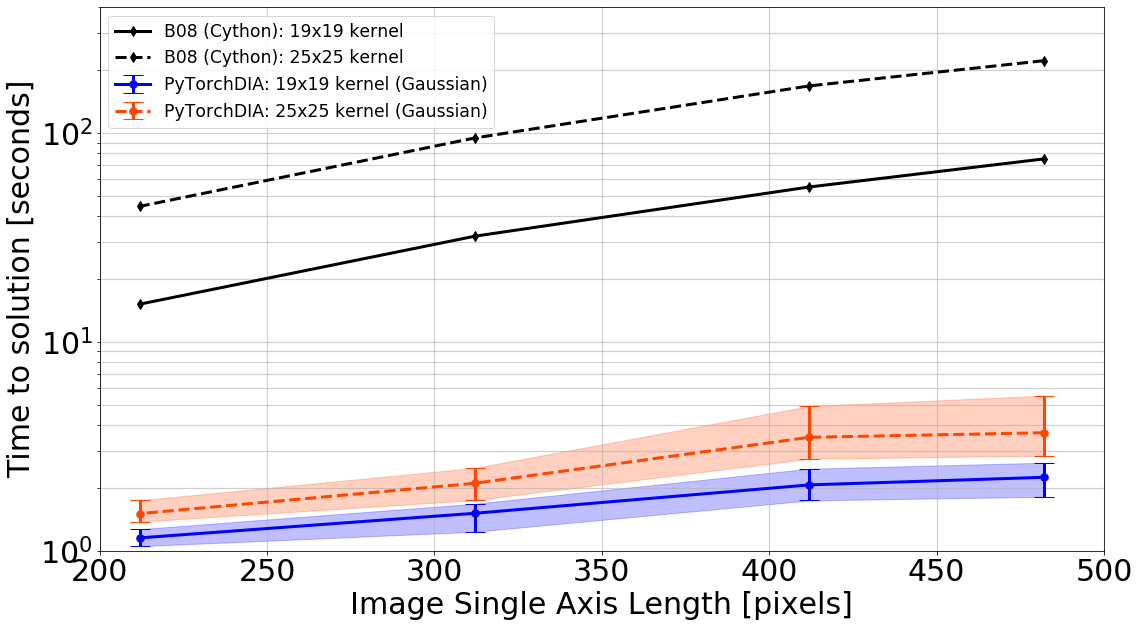

In [9]:
# plot!
fs = 30
lw = 3
ms = 7.5
cs=10

fig, ax = plt.subplots(figsize=(18,10))
ax.errorbar(x=axes, y=set_1_medians, yerr=(set_1_lower, set_1_upper), capsize=cs, alpha=1,
             marker='o', markersize=ms, linestyle='-', c='blue', lw=lw,
            label='PyTorchDIA: 19x19 kernel (Gaussian)')
ax.errorbar(x=axes, y=set_2_medians, yerr=(set_2_lower, set_2_upper), capsize=cs, alpha=1,
             marker='o', markersize=ms, linestyle='--', c='orangered', lw=lw,
            label='PyTorchDIA: 25x25 kernel (Gaussian)')
ax.plot(axes, pyDANDIA_19x19, marker='d', markersize=ms, c='black', linestyle='-',
        lw=lw, label='B08 (Cython): 19x19 kernel')
ax.plot(axes, pyDANDIA_25x25, marker='d', markersize=ms, c='black', linestyle='--',
        lw=lw, label='B08 (Cython): 25x25 kernel')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_yticks([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300], minor=False)

# top curves
set_1_top_curve = np.array(set_1_medians) + np.array(set_1_upper)
set_2_top_curve = np.array(set_2_medians) + np.array(set_2_upper)
# bottom curve
set_1_bottom_curve = np.array(set_1_medians) - np.array(set_1_lower)
set_2_bottom_curve = np.array(set_2_medians) - np.array(set_2_lower)

plt.fill_between(axes, set_1_top_curve, set_1_bottom_curve, alpha=0.25, color='blue')
plt.fill_between(axes, set_2_top_curve, set_2_bottom_curve, alpha=0.25, color='orangered')

plt.xlabel('Image Single Axis Length [pixels]', fontsize=fs)
plt.ylabel('Time to solution [seconds]', fontsize=fs)
plt.xlim(200, 500)
plt.ylim(1, 400)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.grid(alpha=0.6, lw=1.2, linestyle='-')
plt.legend(fontsize='xx-large')

plt.savefig('PyTorch_vs_B08_speedtest_robust_gaussian.png')

**Solution time vs Image properties**

As PyTorchDIA is not analytic, it's worth briefly looking into how the solution time may be correlated (if at all) with image properties. We'll grab the results for the 19x19 kernel and 482x482 image combination above. 

In [10]:
## correlations with resolution or SNR ##
example = data_11
total_times, image_FWHMs, image_SNRs = example[:,0], example[:,1], example[:,2]
print(np.max(image_FWHMs), np.min(image_SNRs))

14.08981066682347 124.39186220047192


In [11]:
# plot a pair plot
import pandas as pd
import seaborn as sns

In [12]:
# get rid of outlier
example = example[np.where(example[:,2] > 500)]

df = pd.DataFrame(example, columns=['Time to Solution [seconds]',
                                  '$\mathrm{FWHM}_{I}$ [pixels]',
                                  '$\mathrm{SNR}_{I}$'])

<Figure size 1440x1440 with 0 Axes>

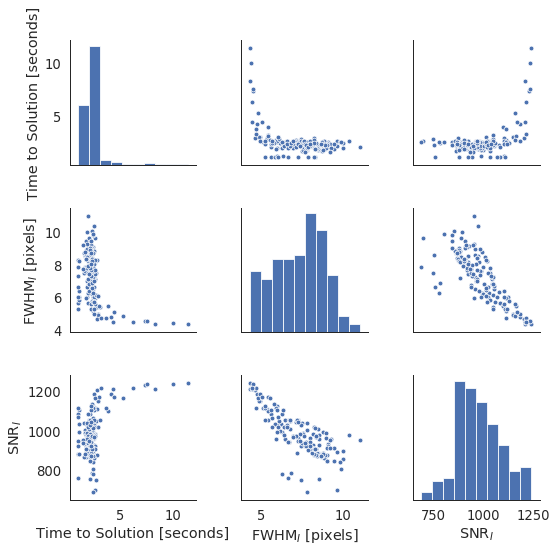

In [13]:
plt.figure(figsize=(20,20))
sns.set(context='paper', font_scale = 1.5, style='white')
sns.pairplot(df, corner=False)
plt.savefig('Speed_test_pairplot_gaussian.png', bbox_inches='tight')

In [14]:
## spearman's correlation coefficient
from scipy.stats import spearmanr
total_times, image_FWHMs, image_SNRs = example[:,0], example[:,1], example[:,2]
rho_res = spearmanr(total_times, image_FWHMs)
rho_SNR = spearmanr(total_times, image_SNRs)
res_vs_SNR = spearmanr(image_FWHMs, image_SNRs)
print('Spearman (FWHM):', rho_res)
print('Spearman (SNR):', rho_SNR)
print('FWHM vs SNR:', res_vs_SNR)

Spearman (FWHM): SpearmanrResult(correlation=-0.3718114103907863, pvalue=1.630171519126368e-06)
Spearman (SNR): SpearmanrResult(correlation=0.3478593888575344, pvalue=8.04222345105402e-06)
FWHM vs SNR: SpearmanrResult(correlation=-0.789684877728093, pvalue=1.046197477806246e-34)


### Flat, 'boxcar' kernel initialisation

In [15]:
# single axis lengths
axes = [482, 412, 312, 212] #, 112]

##### load data sets ####
### kernel ###
# axis = 482
# axis = 412

### 1) 19 x 19 kernel ###
data_11 = np.genfromtxt('Downloads/RealImageSpeedTest_482_19.txt')
data_12 = np.genfromtxt('Downloads/RealImageSpeedTest_412_19.txt')
data_13 = np.genfromtxt('Downloads/RealImageSpeedTest_312_19.txt')
data_14 = np.genfromtxt('Downloads/RealImageSpeedTest_212_19.txt')


### 2) 25 x 25 kernel
data_21 = np.genfromtxt('Downloads/RealImageSpeedTest_482_25.txt')
data_22 = np.genfromtxt('Downloads/RealImageSpeedTest_412_25.txt')
data_23 = np.genfromtxt('Downloads/RealImageSpeedTest_312_25.txt')
data_24 = np.genfromtxt('Downloads/RealImageSpeedTest_212_25.txt')

print(data_11.shape, data_12.shape, data_13.shape, data_14.shape)
print(data_21.shape, data_22.shape, data_23.shape, data_24.shape)

(158, 3) (158, 3) (158, 3) (158, 3)
(158, 3) (158, 3) (158, 3) (158, 3)


In [16]:
data_11_times = return_median_and_uncertanties(data_11)
data_12_times = return_median_and_uncertanties(data_12)
data_13_times = return_median_and_uncertanties(data_13)
data_14_times = return_median_and_uncertanties(data_14)
#data_15_times = return_median_and_uncertanties(data_15)

data_21_times = return_median_and_uncertanties(data_21)
data_22_times = return_median_and_uncertanties(data_22)
data_23_times = return_median_and_uncertanties(data_23)
data_24_times = return_median_and_uncertanties(data_24)
#data_25_times = return_median_and_uncertanties(data_25)

In [17]:
### concatenate results ###
# 1)
set_1_medians_bc = [data_11_times[0], data_12_times[0], data_13_times[0], data_14_times[0]]#,data_15_times[0]]
set_1_upper_bc = [data_11_times[1], data_12_times[1], data_13_times[1], data_14_times[1]]#,data_15_times[1]]
set_1_lower_bc = [data_11_times[2], data_12_times[2], data_13_times[2], data_14_times[2]]#,data_15_times[2]]

# 2)
set_2_medians_bc = [data_21_times[0], data_22_times[0], data_23_times[0], data_24_times[0]]#,data_25_times[0]]
set_2_upper_bc = [data_21_times[1], data_22_times[1], data_23_times[1], data_24_times[1]]#,data_25_times[1]]
set_2_lower_bc = [data_21_times[2], data_22_times[2], data_23_times[2], data_24_times[2]]#,data_25_times[2]]

print(set_1_medians_bc)
print(set_2_medians_bc)

print((np.array(set_2_medians_bc)/np.array(set_1_medians_bc)))

[2.588334560394287, 2.2676678895950317, 1.6529865264892578, 1.3180770874023438]
[3.982765316963196, 3.7386298179626465, 2.3669378757476807, 1.637476921081543]
[1.53873668 1.64866727 1.43191601 1.24232257]


In [18]:
## Gaussian kernel vs boxcar
print('Improvement of Gaussian over boxcar kernel')
r19x19 = np.array(set_1_medians_bc)/np.array(set_1_medians)
r25x25 = np.array(set_2_medians_bc)/np.array(set_2_medians)
print('Mean, median 19x19 speedup:', np.mean(r19x19), np.median(r19x19))
print('Mean, median 25x25 speedup:', np.mean(r25x25), np.median(r25x25))

Improvement of Gaussian over boxcar kernel
Mean, median 19x19 speedup: 1.1211097328390198 1.1198285889802975
Mean, median 25x25 speedup: 1.0913635938979145 1.0854768175044942


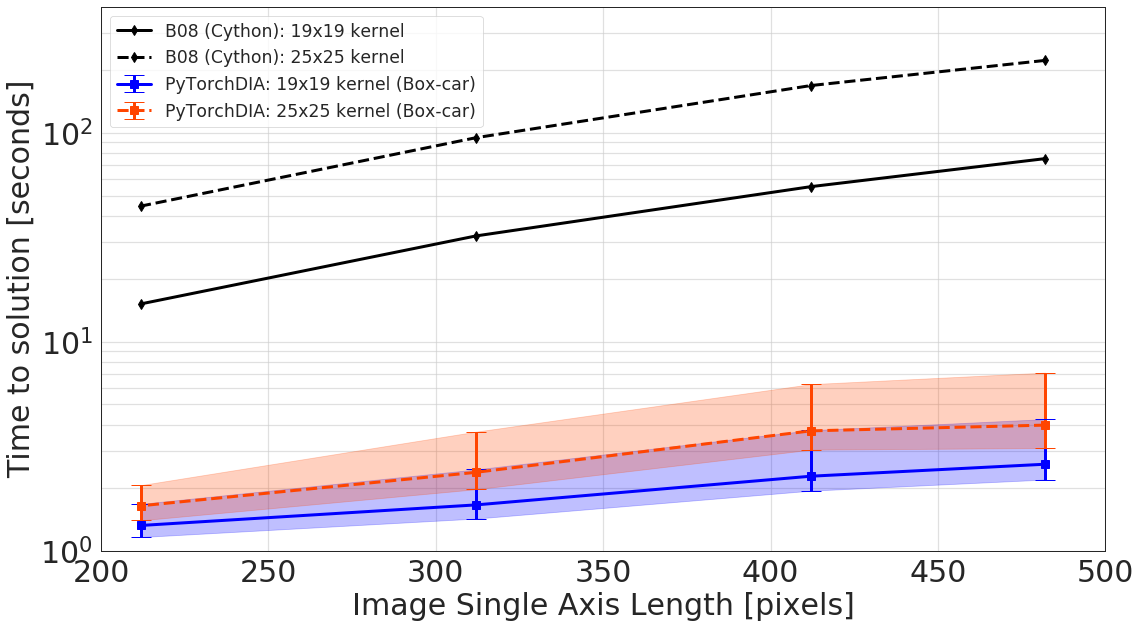

In [19]:
# plot!
fs = 30
lw = 3
ms = 7.5
cs=10

fig, ax = plt.subplots(figsize=(18,10))
ax.errorbar(x=axes, y=set_1_medians_bc, yerr=(set_1_lower_bc, set_1_upper_bc), capsize=cs, alpha=1,
             marker='s', markersize=ms, linestyle='-', c='blue', lw=lw,
            label='PyTorchDIA: 19x19 kernel (Box-car)')
ax.errorbar(x=axes, y=set_2_medians_bc, yerr=(set_2_lower_bc, set_2_upper_bc), capsize=cs, alpha=1,
             marker='s', markersize=ms, linestyle='--', c='orangered', lw=lw,
            label='PyTorchDIA: 25x25 kernel (Box-car)')
ax.plot(axes, pyDANDIA_19x19, marker='d', markersize=ms, c='black', linestyle='-',
        lw=lw, label='B08 (Cython): 19x19 kernel')
ax.plot(axes, pyDANDIA_25x25, marker='d', markersize=ms, c='black', linestyle='--',
        lw=lw, label='B08 (Cython): 25x25 kernel')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_yticks([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300], minor=False)

# top curves
set_1_top_curve = np.array(set_1_medians_bc) + np.array(set_1_upper_bc)
set_2_top_curve = np.array(set_2_medians_bc) + np.array(set_2_upper_bc)
# bottom curve
set_1_bottom_curve = np.array(set_1_medians_bc) - np.array(set_1_lower_bc)
set_2_bottom_curve = np.array(set_2_medians_bc) - np.array(set_2_lower_bc)

plt.fill_between(axes, set_1_top_curve, set_1_bottom_curve, alpha=0.25, color='blue')
plt.fill_between(axes, set_2_top_curve, set_2_bottom_curve, alpha=0.25, color='orangered')

plt.xlabel('Image Single Axis Length [pixels]', fontsize=fs)
plt.ylabel('Time to solution [seconds]', fontsize=fs)
plt.xlim(200, 500)
plt.ylim(1, 400)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.grid(alpha=0.6, lw=1.2, linestyle='-')
plt.legend(fontsize='large')

plt.savefig('PyTorch_vs_B08_speedtest_robust_boxcar.png')

In [20]:
## correlations with resolution or SNR ##
example_bc = data_11
total_times, image_FWHMs, image_SNRs = example_bc[:,0], example_bc[:,1], example_bc[:,2]
print(np.max(image_FWHMs), np.min(image_SNRs))

14.08981066682347 124.3933968405536


In [21]:
# get rid of outlier
example_bc = example_bc[np.where(example_bc[:,2] > 500)]

df = pd.DataFrame(example_bc, columns=['Time to Solution [seconds]',
                                  '$\mathrm{FWHM}_{I}$ [pixels]',
                                  '$\mathrm{SNR}_{I}$'])

<Figure size 1440x1440 with 0 Axes>

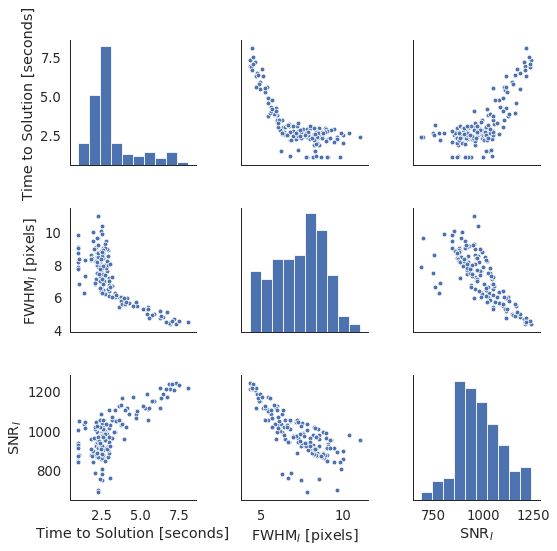

In [22]:
plt.figure(figsize=(20,20))
sns.set(context='paper', font_scale = 1.5, style='white')
sns.pairplot(df, corner=False)
plt.savefig('Speed_test_pairplot_bc.png', bbox_inches='tight')

In [23]:
## spearman's correlation coefficient
total_times, image_FWHMs, image_SNRs = example_bc[:,0], example_bc[:,1], example_bc[:,2]
rho_res = spearmanr(total_times, image_FWHMs)
rho_res_phi = spearmanr(total_times, np.array(image_FWHMs) / 2.355)
rho_SNR = spearmanr(total_times, image_SNRs)
res_vs_SNR = spearmanr(image_FWHMs, image_SNRs)
print('Spearman (FWHM):', rho_res)
print('Spearman (SNR):', rho_SNR)
print('FWHM vs SNR:', res_vs_SNR)
print('Spearman (phi):', rho_res_phi)

Spearman (FWHM): SpearmanrResult(correlation=-0.702420010047197, pvalue=1.1712242464810044e-24)
Spearman (SNR): SpearmanrResult(correlation=0.6152605759152562, pvalue=1.0041632915000464e-17)
FWHM vs SNR: SpearmanrResult(correlation=-0.789691079701561, pvalue=1.0440815350398816e-34)
Spearman (phi): SpearmanrResult(correlation=-0.702420010047197, pvalue=1.1712242464810044e-24)


In [24]:
## pairplot which combines results for both kernel initialisations
## Time bc | Time gauss | FWHM | SNR

# get rid of outlier
example = example[np.where(example[:,2] > 500)]
example_bc = example_bc[np.where(example_bc[:,2] > 500)]

samples = np.vstack((example_bc[:,0], example[:,0], example[:,1], example[:,2])).T
print(samples.shape)
df_combined = pd.DataFrame(samples, columns=['Time (Box-car) [s]',
                                             'Time (Gaussian) [s]',
                                             '$\mathrm{FWHM}_{I}$ [pixels]',
                                             '$\mathrm{SNR}_{I}$'])

# convert FWHMs to phi_Is and drop the former
df_combined['$\phi_I$ [pixels]'] = df_combined['$\mathrm{FWHM}_{I}$ [pixels]'] / 2.355
df_combined =  pd.DataFrame.drop(df_combined, columns=['$\mathrm{FWHM}_{I}$ [pixels]'])
df_combined

(157, 4)


,Time (Box-car) [s],Time (Gaussian) [s],$\mathrm{SNR}_{I}$,$\phi_I$ [pixels]
0,2.490438,2.145664,1080.582522,2.677860
1,2.432937,2.073342,1051.196634,2.754777
2,1.420183,2.239228,1029.037098,2.658124
3,2.615949,2.147521,1015.071655,2.724183
4,1.002868,1.725471,1000.534706,3.322630
...,...,...,...,...
152,2.379817,2.099921,946.077267,3.145070
153,2.555352,1.664617,878.320360,3.729088
154,1.021533,2.279898,867.597468,3.683510
155,2.438390,1.494494,934.245106,3.273106


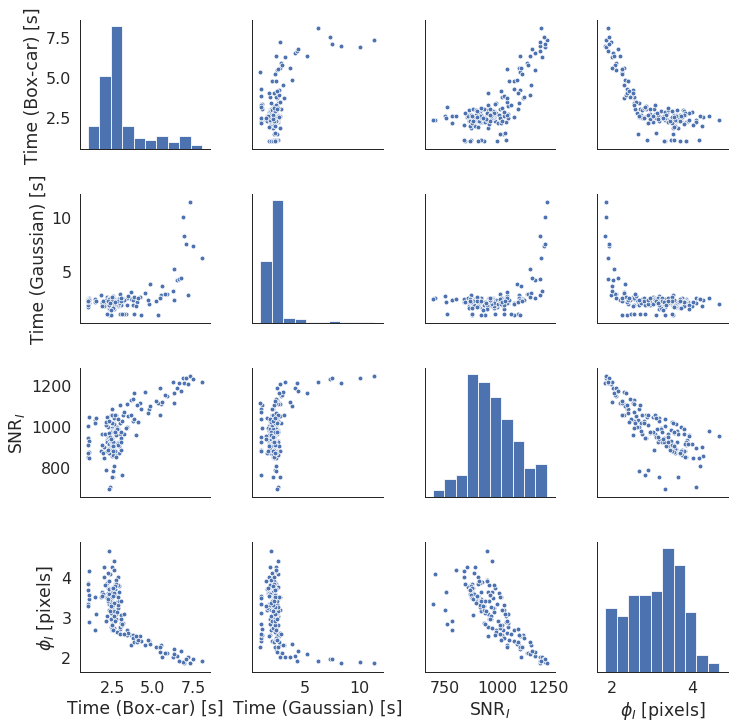

In [25]:
#plt.figure(figsize=(20,20))
sns.set(context='paper', font_scale = 1.8, style='white')
sns.pairplot(df_combined, corner=False)
plt.savefig('Speed_test_pairplot_combined.png', bbox_inches='tight')

### Discussion: Likely causes for correlations between solution times and FWHM and/or signal-to-noise?


**Boxcar kernel**

Clearly, the time to solution is strongly correlated with these two image properties. The solution times are limited around 2.5 seconds since a minimum number of optimisation steps is required before the algorithm converges, to prevent early stopping and guarantee an accurate solution. This explains the scatter around this time, at the low end; what we're interested in explaing are the extend 'tails' only the plots against FWHM and SNR as the solution time increases above 2.5 seconds.

This is almost certainly due to effective 'sharpness' of the kernel surfaces. When the difference between PSF of the target and reference images is small, the kernel is sharply peaked. In these instances, the initialised boxcar kernel is further aways from the MLE solution, and so takes more optimisation steps to converge. Converesely, when the difference between the PSFs of the two images is large, the kernel too is broad, and closer to the intialised values.

**Gaussian kernel**

As expected from the commentary above, the correlation is much, much weaker. A 'tail' only exists for those images very similar in FWHM to the reference itself. In the cell below, I plot the estimated kernel width, $\phi_k$ -- where $\phi_k = 1$ is a critically sampled kernel -- against the solution times. Note the ballooning solution time for undersample kernels i.e. $\phi_k < 1$. Once you're in the regime of $\phi_k > 1.5$, the solution time is effectively independent of $\phi_k$.

In [ ]:
ref_fwhm = 4.29
# compute oversampled kernel cutoff (crude gaussian approximation)
kernel_fwhm = np.sqrt(example[:,1]**2 - ref_fwhm**2)
phi_k = kernel_fwhm / 2.355

print('phi_r:', ref_fwhm / 2.355)

plt.scatter(phi_k, example[:,0])
plt.xlabel('$\phi_k$ [pixels]')
plt.ylabel('Time to solution [seconds]')
plt.grid()
plt.vlines(1, 0, 15, color='orange', linestyle='--')
plt.ylim(0, 15)

## Simulated Image Speed Test Results

In [27]:
### simulated image speed test ###

sal = np.array([250, 500, 1000, 2000, 3000, 4000]) # single axis length of square image (pixels)


syn_19x19 = np.array([3.9159884452819824, 5.588447570800781, 15.066317558288574,
            46.148685932159424, 101.72546982765198, 181.80401158332825])

syn_25x25 = np.array([6.11519193649292, 11.488626956939697, 23.620509147644043,
             73.00126338005066, 147.5150489807129, 253.93479228019714])


syn_19x19_GK = [2.152986526489258, 2.399519443511963, 2.5135226249694824,
                11.092067956924438, 18.65364146232605, 27.12901496887207]
 
syn_25x25_GK = [4.236353635787964, 2.132552146911621, 6.28883957862854,
                19.75536274909973, 28.89033031463623, 48.738253116607666]


predicted_ratio = 25**2 / 19**2
ratio = syn_25x25/syn_19x19
print('PyTorchDIA: 19x19 vs 25x25 kernel scaling')
print('Predicted Ratio:', predicted_ratio)
print('Observed Mean / Median ratio:', np.mean(ratio), np.median(ratio))

print('\nPyTorchDIA: scaling with image size (19x19)')
b = syn_19x19[2] # benchmark 1kx1k, 19x19 kernel
predicted_times = b * (np.array(sal**2) / 1000**2)
ratio_imagscaling_19x19 = syn_19x19 / predicted_times
print('Mean, Median observed/predicted times:', np.mean(ratio_imagscaling_19x19),
                                                np.median(ratio_imagscaling_19x19))

print('\nPyTorchDIA: scaling with image size (25x25)')
b = syn_25x25[2] # benchmark 1kx1k, 25x25 kernel
predicted_times = b * (np.array(sal**2) / 1000**2)
ratio_imagscaling_25x25 = syn_25x25 / predicted_times
print('Mean, Median observed/predicted times:', np.mean(ratio_imagscaling_25x25),
                                                np.median(ratio_imagscaling_25x25))


print('\nImprovement of Gaussian over Boxcar kernel')
print('19x19, Mean and Median Speedup:', np.mean(syn_19x19/syn_19x19_GK), np.median(syn_19x19/syn_19x19_GK))
print('25x25, Mean and Median Speedup:', np.mean(syn_25x25/syn_25x25_GK), np.median(syn_25x25/syn_25x25_GK))

# extrapolate pyDANDIA kernel solution times
# for 482x482 image, this took 82.7 seconds to perform 3 model iterations for 19x19 kernel
#pyDANDIA_19X19_syn = 82.7 * (sal/482)**2
#pyDANDIA_25X25_syn = 249.7 * (sal/482)**2

pyDANDIA_19X19_syn = [20.946699857711792, 80.78913521766663, 354.2445683479309,
                     1668.0713078975677, 3482.431879043579, 6222.059315919876]

pyDANDIA_25X25_syn = [62.313334226608276, 239.21140456199646, 1009.9397025108337,
                         5109.8343341350555, 11805.559381723404, 21215.697]

PyTorchDIA: 19x19 vs 25x25 kernel scaling
Predicted Ratio: 1.7313019390581716
Observed Mean / Median ratio: 1.602316130511088 1.5646826229902722

PyTorchDIA: scaling with image size (19x19)
Mean, Median observed/predicted times: 1.4854179931974543 0.88287960672556

PyTorchDIA: scaling with image size (25x25)
Mean, Median observed/predicted times: 1.5377165662649592 0.8863235066385728

Improvement of Gaussian over Boxcar kernel
19x19, Mean and Median Speedup: 4.409551777950283 4.806948182746227
25x25, Mean and Median Speedup: 4.099697304466868 4.430988093575612



19x19 kernel: PyTorchDIA / pyDANDIA
Observed Mean / Median ratio of solution times: 24.653505653165478 28.868172982508764

25x25 kernel: PyTorchDIA / pyDANDIA
Observed Mean / Median ratio of solution times: 51.223710660176884 56.376708648335736


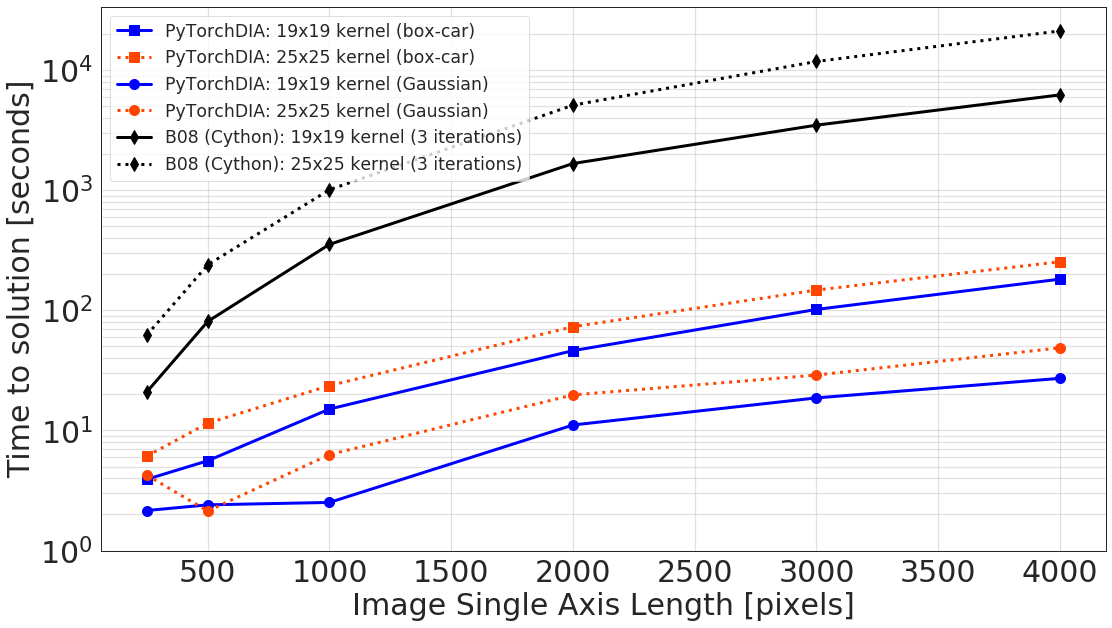

In [28]:


#### plot! ####
fs = 30
lw = 3
ms = 10
cs=10

fig, ax = plt.subplots(figsize=(18,10))
ax.plot(sal, syn_19x19, marker='s', markersize=ms, linestyle='-', c='blue',
        lw=lw, label='PyTorchDIA: 19x19 kernel (box-car)')

ax.plot(sal, syn_25x25, marker='s', markersize=ms, linestyle=':', c='orangered',
        lw=lw, label='PyTorchDIA: 25x25 kernel (box-car)')

ax.plot(sal, syn_19x19_GK, marker='o', markersize=ms, linestyle='-', c='blue',
        lw=lw, label='PyTorchDIA: 19x19 kernel (Gaussian)')

ax.plot(sal, syn_25x25_GK, marker='o', markersize=ms, linestyle=':', c='orangered',
        lw=lw, label='PyTorchDIA: 25x25 kernel (Gaussian)')

plt.plot(sal, pyDANDIA_19X19_syn, marker='d', markersize=ms, lw=lw,
         c='black', label='B08 (Cython): 19x19 kernel (3 iterations)')
plt.plot(sal, pyDANDIA_25X25_syn, marker='d', markersize=ms, lw=lw, linestyle=':',
         c='black', label='B08 (Cython): 25x25 kernel (3 iterations)')
ax.set_yscale('log')

ax.set_yticks([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,
              400,500,600,700,800,900,1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3,
              8e3, 9e3, 1e4, 2e4], minor=False)

plt.xlabel('Image Single Axis Length [pixels]', fontsize=fs)
plt.ylabel('Time to solution [seconds]', fontsize=fs)
#plt.xlim(200, 500)
#plt.ylim(1, 400)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.grid(alpha=0.6, lw=1.2, linestyle='-')
plt.legend(fontsize='medium')


plt.savefig('Speedtest_synthetic_images.png')

print('\n19x19 kernel: PyTorchDIA / pyDANDIA')
ratio19x19 = pyDANDIA_19X19_syn / syn_19x19
print('Observed Mean / Median ratio of solution times:', np.mean(ratio19x19), np.median(ratio19x19))
print('\n25x25 kernel: PyTorchDIA / pyDANDIA')
ratio25x25 = pyDANDIA_25X25_syn / syn_25x25
print('Observed Mean / Median ratio of solution times:', np.mean(ratio25x25), np.median(ratio25x25))

Non-deterministic convolution speed-up:
Mean / median: 1.2333317968252389 1.1951322309942398


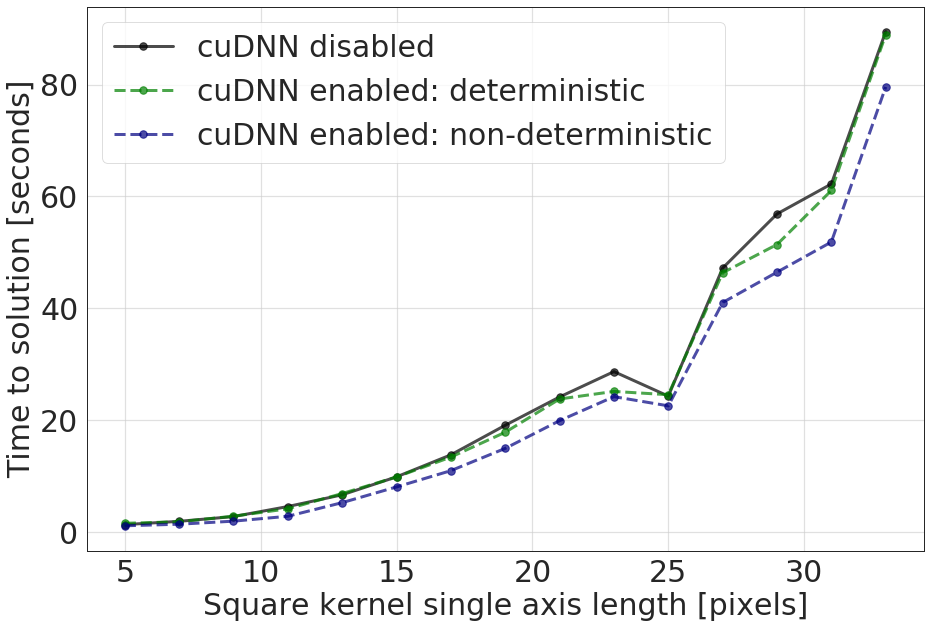

In [29]:
### PyTorchDIA.py kernel scaling tests ###
kernel_sizes = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]



'''
cuDNNdisabled = [10.2230806350708, 4.5716962814331055, 5.585522890090942,
                       7.985094785690308, 9.421030521392822, 12.30045747756958,
                       16.13136100769043, 19.23486328125, 21.881683826446533,
                       29.18730330467224, 30.08158588409424, 34.3050537109375,
                       40.89340281486511, 46.411651372909546, 54.170286893844604]


deterministic = [12.23781681060791, 4.485419273376465, 6.253260374069214,
                       7.006073713302612, 10.993529796600342, 13.190404176712036,
                       14.759538173675537, 18.92989206314087, 22.908090353012085,
                       26.798729419708252, 31.022372722625732, 34.82561898231506,
                       42.37469005584717, 49.17344689369202, 52.599733114242554]

nondeterministic = [8.243207931518555, 3.024844169616699, 4.198887586593628,
                          4.663999080657959, 8.29283857345581, 10.899527072906494,
                          13.78445315361023, 16.472702503204346, 19.36220383644104,
                          22.806443691253662, 26.45068120956421, 32.893407106399536,
                          37.807419538497925, 40.03911066055298, 47.148903369903564]
                          
'''

nondeterministic = [1.065241813659668, 1.3503475189208984, 1.8943116664886475,
                    2.7699334621429443, 5.208951473236084, 8.017351627349854,
                    10.930649042129517, 14.916229248046875, 19.875815629959106,
                    24.171220302581787, 22.52640151977539, 41.010013580322266,
                    46.44240403175354, 51.841384172439575, 79.58302068710327]



deterministic = [1.5133507251739502, 1.7847464084625244, 2.7841711044311523,
                 4.107367038726807, 6.837633848190308, 9.799437522888184,
                 13.363263845443726, 17.80151343345642, 23.754227876663208,
                 25.1048526763916, 24.51835608482361, 46.333351612091064,
                 51.39449691772461, 61.05897784233093, 88.94762706756592]


cuDNNdisabled = [1.2760591506958008, 1.8634753227233887, 2.715912103652954,
                 4.511234283447266, 6.610958814620972, 9.821248769760132,
                 13.76036548614502, 19.05332374572754, 24.119351863861084,
                 28.653454065322876, 24.269593238830566, 47.17405104637146,
                 56.865418672561646, 62.22583532333374, 89.48814702033997]




print('Non-deterministic convolution speed-up:')
ratio = np.array(deterministic )/ np.array(nondeterministic)
print('Mean / median:', np.mean(ratio), np.median(ratio))

#### plot! ####
fs = 30
lw = 3
ms = 7.5
cs = 10
alpha = 0.7

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(kernel_sizes, cuDNNdisabled, marker='o', markersize=ms, linestyle='-', c='black',
        lw=lw, label='cuDNN disabled', alpha=alpha)

ax.plot(kernel_sizes, deterministic, marker='o', markersize=ms, linestyle='--', c='green',
        lw=lw, label='cuDNN enabled: deterministic', alpha=alpha)

ax.plot(kernel_sizes, nondeterministic, marker='o', markersize=ms, linestyle='--', c='navy',
        lw=lw, label='cuDNN enabled: non-deterministic', alpha=alpha)


plt.xlabel('Square kernel single axis length [pixels]', fontsize=fs)
plt.ylabel('Time to solution [seconds]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.grid(alpha=0.6, lw=1.2, linestyle='-')
plt.legend(fontsize='xx-large')

plt.savefig('cuDNN_kernel_scaling.png')
#plt.xlim(4, 28)
#plt.ylim(0, 100)

In [30]:
import numpy as np
sm = np.sum([1.065241813659668, 1.3503475189208984, 1.8943116664886475,
                    2.7699334621429443, 5.208951473236084, 8.017351627349854,
                    10.930649042129517, 14.916229248046875, 19.875815629959106,
                    24.171220302581787, 22.52640151977539, 41.010013580322266,
                    46.44240403175354, 51.841384172439575, 79.58302068710327])

sm / 60

5.526721262931824

In [28]:
7.48  /2.355

3.1762208067940554